In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def initialize_network(n,m,p,q,r,s,t):
    network = nx.DiGraph()

    #populate the network with n participants
    for i in range(n):
        network.add_node(i)
        network.nodes[i]['type']="participant"
    
    #populate the network with m artifacts
    for i in range(m):
        network.add_node(n+i)
        network.nodes[n+i]['type']="artifact"
        #add an "author" type edge to a participant node
        author = np.random.randint(0,n)
        network.add_edge(author,n+i)
        network.edges[author,n+i]['type']="author"

    #populate the network with p organizations
    for i in range(p):
        network.add_node(n+m+i)
        network.nodes[n+m+i]['type']="organization"
        #add a "member" type edge to a participant node
        member_count = np.random.randint(1,n/2)
        #choose member_count number of participants to be members of the organization
        members = np.random.choice(n,member_count,replace=False)
        for member in members:
            network.add_edge(member,n+m+i)
            network.edges[member,n+m+i]['type']="member"

    #populate the network with q attributes
    for i in range(q):
        network.add_node(n+m+p+i)
        network.nodes[n+m+p+i]['type']="attribute"

    #populate the network with r evaluators
    for i in range(r):
        network.add_node(n+m+p+q+i)
        network.nodes[n+m+p+q+i]['type']="evaluator"
        #for each evaluator assign an organization as its operator and an attribute as its target
        operator = np.random.randint(n+m,n+m+p)
        network.add_edge(operator,n+m+p+q+i)
        network.edges[operator,n+m+p+q+i]['type']="operator"
        target = np.random.randint(n+m+p,n+m+p+q)
        network.add_edge(n+m+p+q+i,target)
        network.edges[n+m+p+q+i,target]['type']="target"

    #populate the network with s claims
    for i in range(s):
        network.add_node(n+m+p+q+r+i)
        network.nodes[n+m+p+q+r+i]['type']="claim"
        #for each claim assign a participant as its claimant
        claimant = np.random.randint(n+m+p+q,n+m+p+q+r)
        network.add_edge(claimant,n+m+p+q+r+i)
        network.edges[claimant,n+m+p+q+r+i]['type']="claimant"
        #for each claim assign an evaluator the claim is being made about
        evaluator = np.random.randint(n+m+p+q,n+m+p+q+r)
        network.add_edge(n+m+p+q+r+i,evaluator)
        network.edges[n+m+p+q+r+i,evaluator]['type']="claimed_about"
        #randomly assign a truth value to the claim
        truth = np.random.choice([True,False])
        network.nodes[n+m+p+q+r+i]['value']=truth

    #populate the network with t evaluations
    for i in range(t):
        network.add_node(n+m+p+q+r+s+i)
        network.nodes[n+m+p+q+r+s+i]['type']="evaluation"
        #for each evaluation assign an evaluator as its evaluator
        evaluator = np.random.randint(n+m+p+q,n+m+p+q+r)
        network.add_edge(evaluator,n+m+p+q+r+s+i)
        network.edges[evaluator,n+m+p+q+r+s+i]['type']="evaluated_by"
        #for each evaluation assign artifact as its recipient
        recipient = np.random.randint(n,n+m)
        network.add_edge(n+m+p+q+r+s+i,recipient)
        network.edges[n+m+p+q+r+s+i,recipient]['type']="recipient"
        #for each evaluation assign a truth value to the evaluation
        truth = np.random.choice([True,False])
        network.nodes[n+m+p+q+r+s+i]['value']=truth

    return network


In [3]:
def get_nodes_by_type(g, node_type_selection):
    return [node for node in g.nodes if g.nodes[node]['type']== node_type_selection ]

def get_edges_by_type(g, edge_type_selection):
    return [edge for edge in g.edges if g.edges[edge]['type']== edge_type_selection ]

def get_neighbors_by_type(g, node, neighbor_type_selection):
    return [neighbor for neighbor in g.neighbors(node) if g.nodes[neighbor]['type']== neighbor_type_selection ]

In [4]:
#initialize the network
n = 10 #number of participants
m = 10 #number of artifacts
p = 2 #number of organizations
q = 4 #number of attributes
r = 6 #number of evaluators
s = 25 #number of claims
t = 15 #number of evaluations

network = initialize_network(n,m,p,q,r,s,t)


In [5]:
#summary statistics of the network
print("Number of nodes: ", network.number_of_nodes())
print("Number of edges: ", network.number_of_edges())
print("Number of participants: ", len(get_nodes_by_type(network,"participant")))
print("Number of artifacts: ", len(get_nodes_by_type(network,"artifact")))
print("Number of organizations: ", len(get_nodes_by_type(network,"organization")))
print("Number of attributes: ", len(get_nodes_by_type(network,"attribute")))
print("Number of evaluators: ", len(get_nodes_by_type(network,"evaluator")))
print("Number of claims: ", len(get_nodes_by_type(network,"claim")))
print("Number of evaluations: ", len(get_nodes_by_type(network,"evaluation")))
print("Number of author edges: ", len(get_edges_by_type(network,"author")))
print("Number of member edges: ", len(get_edges_by_type(network,"member")))
print("Number of operator edges: ", len(get_edges_by_type(network,"operator")))
print("Number of claimed_about edges: ", len(get_edges_by_type(network,"claimed_about")))
print("Number of evaluated_by edges: ", len(get_edges_by_type(network,"evaluated_by")))
print("Number of recipient edges: ", len(get_edges_by_type(network,"recipient")))
      


Number of nodes:  72
Number of edges:  107
Number of participants:  10
Number of artifacts:  10
Number of organizations:  2
Number of attributes:  4
Number of evaluators:  6
Number of claims:  25
Number of evaluations:  15
Number of author edges:  10
Number of member edges:  5
Number of operator edges:  6
Number of claimed_about edges:  25
Number of evaluated_by edges:  15
Number of recipient edges:  15


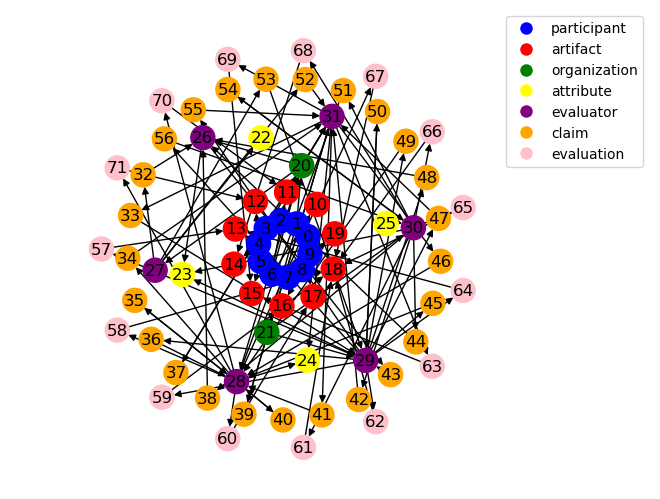

In [6]:
#plot the network
pos = nx.shell_layout(network, nlist=[range(n),range(n,n+m),range(n+m,n+m+p),range(n+m+p,n+m+p+q),range(n+m+p+q,n+m+p+q+r),range(n+m+p+q+r,n+m+p+q+r+s),range(n+m+p+q+r+s,n+m+p+q+r+s+t)])
# add colors to distinguish between different types of nodes
colors = []
for node in network.nodes:
    if network.nodes[node]['type']=="participant":
        colors.append('blue')
    elif network.nodes[node]['type']=="artifact":
        colors.append('red')
    elif network.nodes[node]['type']=="organization":
        colors.append('green')
    elif network.nodes[node]['type']=="attribute":
        colors.append('yellow')
    elif network.nodes[node]['type']=="evaluator":
        colors.append('purple')
    elif network.nodes[node]['type']=="claim":
        colors.append('orange')
    elif network.nodes[node]['type']=="evaluation":
        colors.append('pink')
nx.draw(network, pos, node_color=colors, with_labels=True)
#extend the bounding box of the plot to make room for the legend
plt.xlim(-1.5,2)
# add a legend which says which node type goes to each color
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='participant', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='artifact', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='organization', markerfacecolor='green', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='attribute', markerfacecolor='yellow', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='evaluator', markerfacecolor='purple', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='claim', markerfacecolor='orange', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='evaluation', markerfacecolor='pink', markersize=10)])

In [7]:
#create a method to plot a graph
def plotter(g):
    pos = nx.kamada_kawai_layout(g)
    # add colors to distinguish between different types of nodes
    colors = []
    for node in g.nodes:
        if g.nodes[node]['type']=="participant":
            colors.append('blue')
        elif g.nodes[node]['type']=="artifact":
            colors.append('red')
        elif g.nodes[node]['type']=="organization":
            colors.append('green')
        elif g.nodes[node]['type']=="attribute":
            colors.append('yellow')
        elif g.nodes[node]['type']=="evaluator":
            colors.append('purple')
        elif g.nodes[node]['type']=="claim":
            colors.append('orange')
        elif g.nodes[node]['type']=="evaluation":
            colors.append('pink')
    nx.draw(g, pos, node_color=colors, with_labels=True)
    #extend the bounding box of the plot to make room for the legend
    plt.xlim(-1.5,2)
    # add a legend which says which node type goes to each color
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='participant', markerfacecolor='blue', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='artifact', markerfacecolor='red', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='organization', markerfacecolor='green', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='attribute', markerfacecolor='yellow', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='evaluator', markerfacecolor='purple', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='claim', markerfacecolor='orange', markersize=10),
                        plt.Line2D([0], [0], marker='o', color='w', label='evaluation', markerfacecolor='pink', markersize=10)])

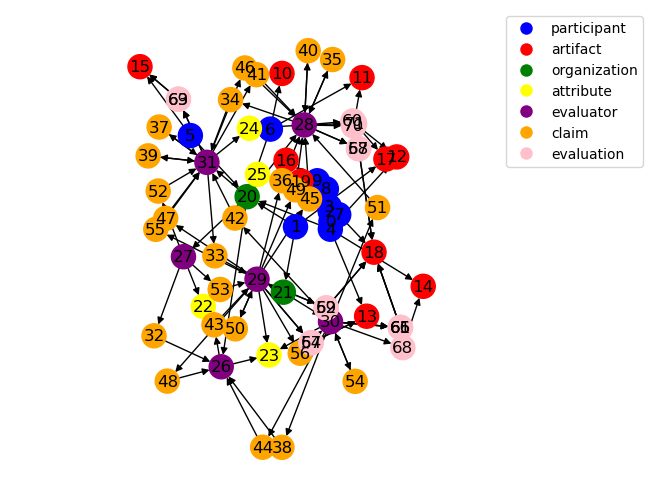

In [8]:
plotter(network)

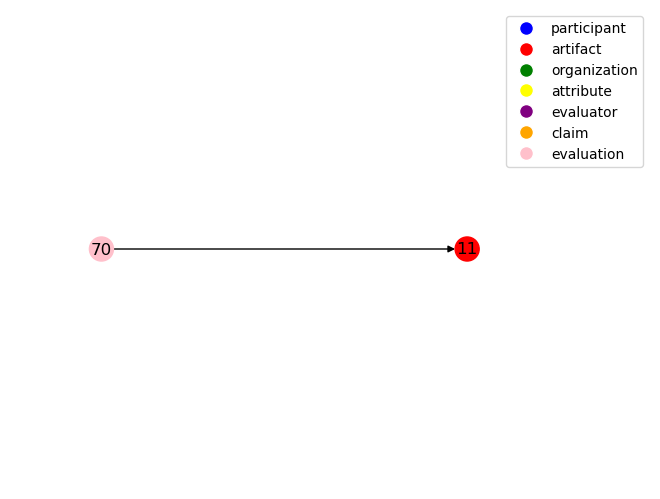

In [9]:
#plot the neighborhood of a node   
node = 70
neighborhood = get_neighbors_by_type(network,node,"artifact")
neighborhood.extend(get_neighbors_by_type(network,node,"organization"))
neighborhood.extend(get_neighbors_by_type(network,node,"attribute"))
neighborhood.extend(get_neighbors_by_type(network,node,"evaluator"))
neighborhood.extend(get_neighbors_by_type(network,node,"claim"))
neighborhood.extend(get_neighbors_by_type(network,node,"evaluation"))
neighborhood.append(node)
subgraph = plotter(network.subgraph(neighborhood))

